In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
Data = pd.read_csv("../input/treelog/data_final.csv")

In [3]:
Data = Data.dropna()
Data

,row,tree no,diameterr,height,pomogranates.no
0,-6.0,2.0,3.2331,2.3459,106.0
1,-6.0,3.0,3.7511,3.1948,63.0
2,-6.0,4.0,3.5868,1.8143,65.0
3,-6.0,5.0,3.2411,2.1539,58.0
4,-6.0,6.0,3.4164,3.1909,96.0
...,...,...,...,...,...
111,7.0,4.0,3.4308,2.2483,75.0
112,7.0,5.0,3.3587,2.0345,101.0
113,7.0,6.0,3.3909,2.4654,109.0
114,7.0,7.0,3.2935,2.1235,98.0


In [4]:
y = Data.iloc[:, -1].values
y

array([106.,  63.,  65.,  58.,  96.,  82.,  73., 107.,  92., 121., 105.,
        77.,  51.,  88.,  76.,  82.,  72.,  91., 111.,  92., 105.,  78.,
       103., 110., 100., 138.,  95., 115., 100.,  75.,  82.,  70., 118.,
       100.,  84., 150., 100., 100., 125.,  95., 140.,  94., 100., 114.,
        90.,  80.,  88.,  72., 100., 146.,  76.,  67., 135., 106., 125.,
       110.,  70.,  75.,  85., 100., 130., 112., 120., 125.,  90.,  97.,
        18.,  80.,  45.,  90., 102., 145.,  72., 137.,  73.,  85.,  83.,
        80., 110., 100., 131., 116., 122., 140., 138., 161., 174., 108.,
       216., 191., 185.,  92., 128., 131., 142., 140., 126., 100.,  82.,
        83.,  95.,  99., 124.,  82., 127., 117., 128., 111.,  98., 103.,
        89.,  75., 101., 109.,  98.,  86.])

In [5]:
x = Data.drop(['pomogranates.no'], axis=1)
x


,row,tree no,diameterr,height
0,-6.0,2.0,3.2331,2.3459
1,-6.0,3.0,3.7511,3.1948
2,-6.0,4.0,3.5868,1.8143
3,-6.0,5.0,3.2411,2.1539
4,-6.0,6.0,3.4164,3.1909
...,...,...,...,...
111,7.0,4.0,3.4308,2.2483
112,7.0,5.0,3.3587,2.0345
113,7.0,6.0,3.3909,2.4654
114,7.0,7.0,3.2935,2.1235


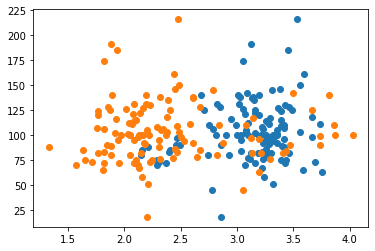

In [6]:
plt.scatter(x['diameterr'],y)
plt.scatter(x['height'],y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 12, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  
## regressor = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
## regressor.fit(x_train, y_train.ravel())

RandomForestRegressor(n_estimators=12, random_state=0)

In [9]:
Y_pred = regressor.predict(x_test)  # test the output by changing values

In [10]:
x_test

,row,tree no,diameterr,height
10,-7.0,2.0,3.3529,2.3271
74,23.0,6.0,2.3074,1.7136
66,22.0,8.0,2.8557,2.2039
51,21.0,3.0,3.2227,2.1312
7,-6.0,9.0,3.4164,1.7538
78,23.0,10.0,2.7552,2.8379
92,4.0,2.0,2.8502,1.8565
90,3.0,6.0,3.4543,1.9305
107,6.0,5.0,3.7367,2.5864
62,22.0,4.0,3.1940,1.7682


In [11]:
y_test

array([105.,  73.,  18.,  67., 107., 110., 128., 185., 111., 120.,  82.,
        65., 142., 103., 114., 138., 100., 137.])

In [12]:
Y_pred

array([100.58333333,  84.5       ,  35.41666667,  88.91666667,
       103.16666667,  91.91666667, 140.91666667, 165.5       ,
       119.75      , 118.5       ,  87.75      ,  71.08333333,
       135.        ,  98.58333333, 111.75      , 131.5       ,
        91.75      , 137.5       ])

In [13]:
pd.DataFrame(data={'predictions': Y_pred.round(), 'actual': y_test})


,predictions,actual
0,101.0,105.0
1,84.0,73.0
2,35.0,18.0
3,89.0,67.0
4,103.0,107.0
5,92.0,110.0
6,141.0,128.0
7,166.0,185.0
8,120.0,111.0
9,118.0,120.0
